# ICS 474 Project (Stocks Analysis)

## Importing the dataset
It's a dataset provided by Yahoo Finance

### Imports

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 6, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.head(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2018-11-12,49.750000,49.962502,48.447498,48.542500,46.364479,204542000,APPLE
2018-11-13,47.907501,49.294998,47.862499,48.057499,45.901237,187531600,APPLE
2018-11-14,48.474998,48.619999,46.482498,46.700001,44.604652,243204000,APPLE
2018-11-15,47.097500,47.992500,46.724998,47.852501,45.705437,185915200,APPLE
2018-11-16,47.625000,48.742500,47.365002,48.382500,46.211655,147713200,APPLE
2018-11-19,47.500000,47.674999,46.247501,46.465000,44.380199,167701200,APPLE
2018-11-20,44.592499,45.367500,43.877499,44.244999,42.259796,271300800,APPLE
2018-11-21,44.932499,45.067501,44.137501,44.195000,42.212040,124496800,APPLE
2018-11-23,43.735001,44.150002,43.025002,43.072498,41.139908,94496000,APPLE


### Descriptive Statistics

In [9]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1.510000e+03
mean,132.605013,134.067989,131.238657,132.722181,130.895212,9.717658e+07
std,53.146270,53.588357,52.705802,53.170721,53.516446,5.392999e+07
min,35.994999,36.430000,35.500000,35.547501,33.952545,1.646354e+07
25%,80.148127,80.860001,79.409998,80.024374,77.778063,6.079935e+07
50%,143.439995,145.320000,141.750000,143.409996,141.587349,8.360100e+07
75%,172.315006,173.937496,170.877499,172.672501,170.933475,1.156058e+08
max,236.479996,237.490005,234.449997,236.479996,236.220108,4.265100e+08


In [10]:
GOOG.describe()


,Open,High,Low,Close,Adj Close,Volume
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1.510000e+03
mean,106.875054,108.081583,105.792862,106.951762,106.710552,2.796725e+07
std,36.870788,37.185864,36.545562,36.845264,36.790586,1.282988e+07
min,48.695000,50.176998,48.505501,48.811001,48.691425,5.842040e+06
25%,71.876377,72.392374,71.079872,71.839750,71.663757,1.954350e+07
50%,106.423752,107.994999,105.299999,106.528000,106.267025,2.502285e+07
75%,137.001251,138.399872,135.612755,136.988377,136.652782,3.226700e+07
max,191.750000,193.309998,190.619995,192.660004,192.406723,1.241400e+08


In [11]:
MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1.510000e+03
mean,259.785351,262.304960,257.114424,259.828822,254.774274,2.843752e+07
std,95.189933,95.768073,94.437583,95.129925,96.733892,1.249972e+07
min,95.139999,97.970001,93.959999,94.129997,88.899727,7.129555e+06
25%,184.189999,185.872505,182.494995,183.755005,176.768074,2.035130e+07
50%,255.565002,257.869995,252.239998,254.404999,249.534096,2.541270e+07
75%,326.132507,330.222488,323.432495,327.195007,322.323494,3.276352e+07
max,467.000000,468.350006,464.459991,467.559998,466.718781,1.112421e+08


In [12]:
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1.510000e+03
mean,134.168965,135.760145,132.456413,134.135492,134.135492,7.240899e+07
std,35.241614,35.493825,34.898208,35.180119,35.180119,3.595825e+07
min,67.300003,69.801498,65.349998,67.197998,67.197998,1.691529e+07
25%,96.930000,97.971498,95.611750,97.159372,97.159372,4.856048e+07
50%,136.616753,138.799995,135.004997,137.275002,137.275002,6.285830e+07
75%,165.143497,166.553123,163.214878,164.883881,164.883881,8.631400e+07
max,209.720001,212.250000,207.440002,210.050003,210.050003,3.113460e+08


Info about the features and their data types(we will look at Apple only since all of them have the same format)

In [13]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510 entries, 2018-11-12 to 2024-11-12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1510 non-null   float64
 1   High          1510 non-null   float64
 2   Low           1510 non-null   float64
 3   Close         1510 non-null   float64
 4   Adj Close     1510 non-null   float64
 5   Volume        1510 non-null   int64  
 6   company_name  1510 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 94.4+ KB


### Charts to describe the features provided

The closing price over the past 6 years to date

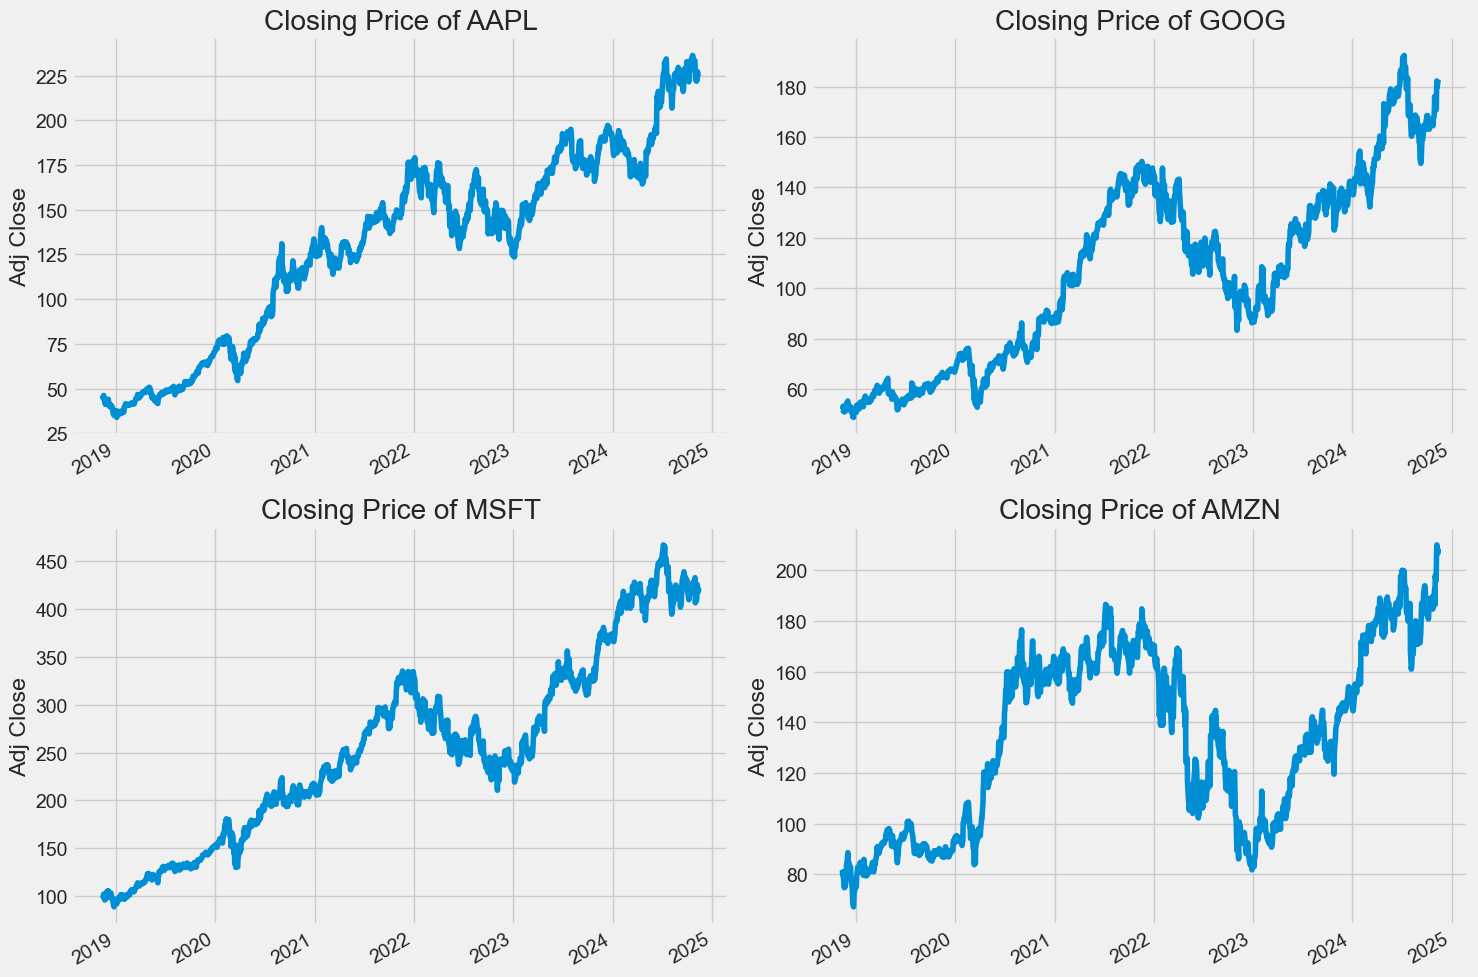

In [21]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

The volume over the past 6 years to date

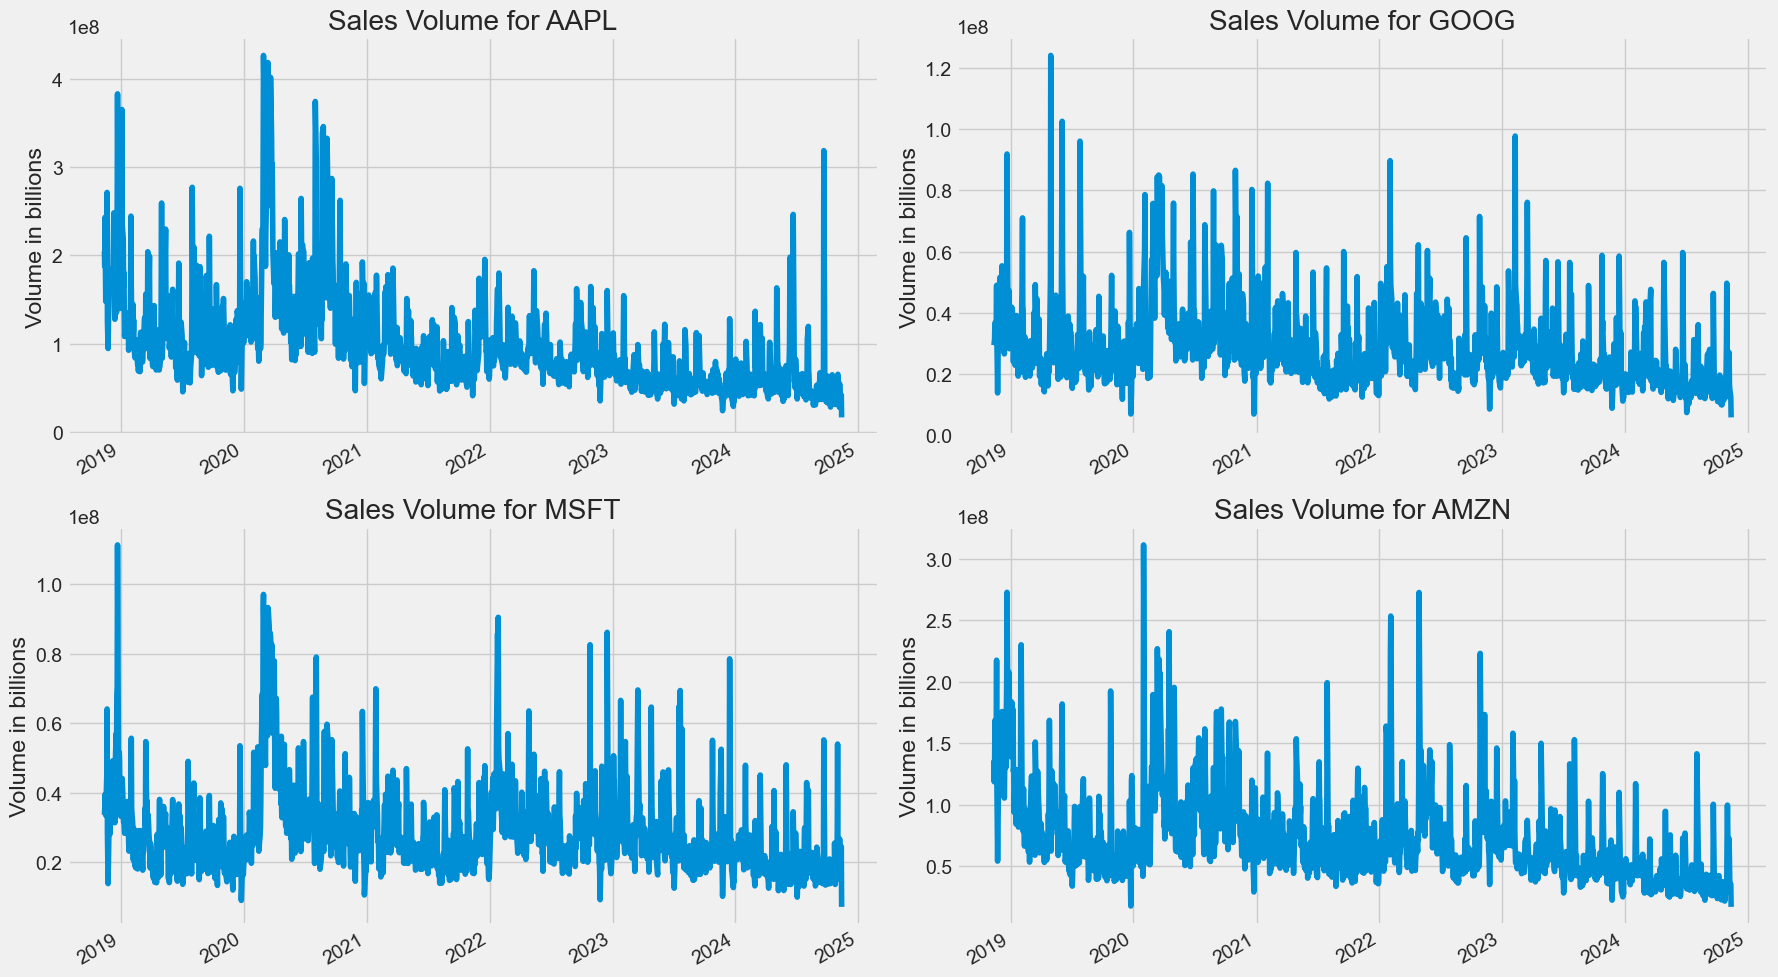

In [25]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(18, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume in billions')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

Stock prices distributions. We can clearly see that it doesn't follow a normal distribbution, since Blue chip stocks go up with time and is not random.

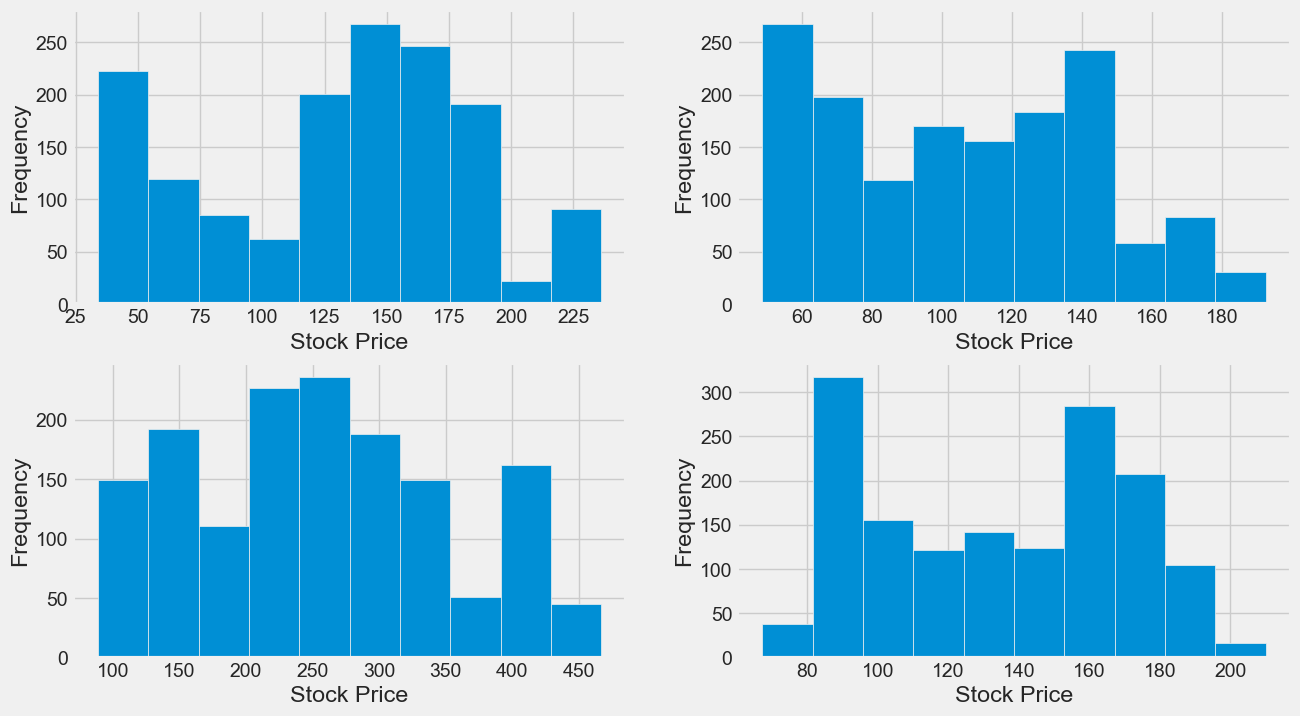

In [35]:
# Plot histograms for each company's stock price
plt.figure(figsize=(14, 8))
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company["Adj Close"].hist()
    plt.xlabel("Stock Price")
    plt.ylabel("Frequency")
plt.show()


The distribution of the Daily return of investment for each stock which shows that it follows the normal distiribution without any skewing because its a random percentage that doesnt depend on a fixed price. 

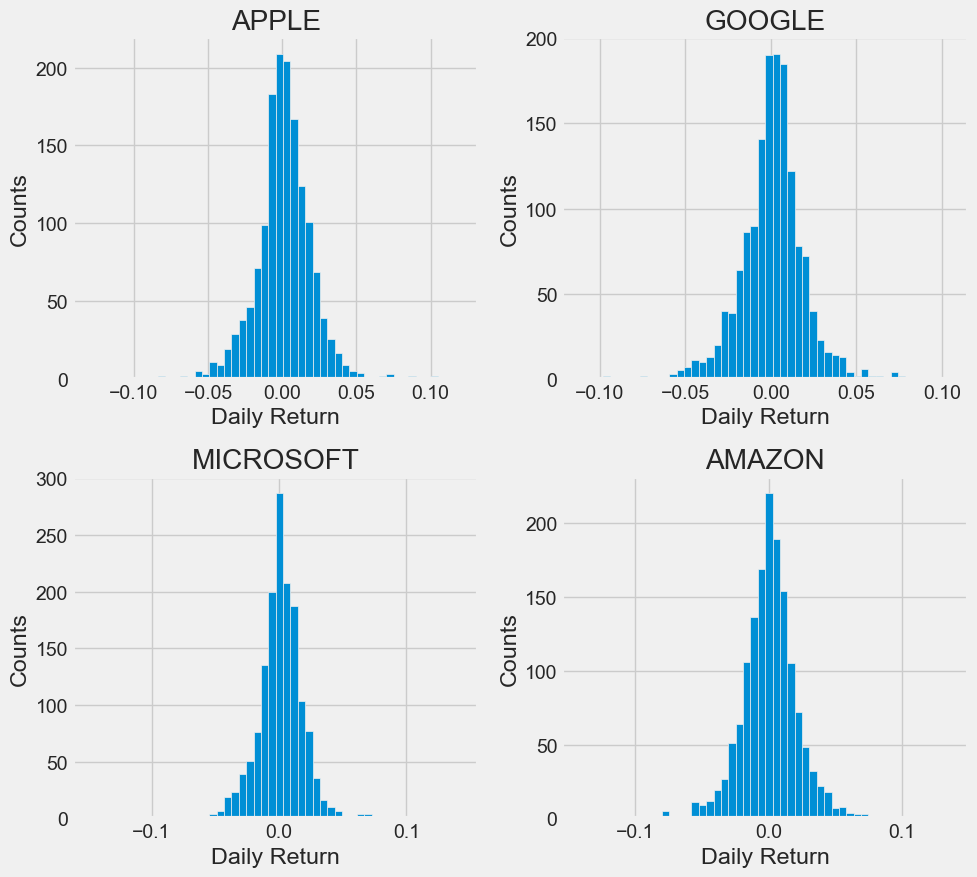

In [42]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

plt.figure(figsize=(10, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

Plotting the 10,20,50 day moving averages. the moving average is used to examine support and resistance by evaluating the movements of an asset's price. A moving average reflects the previous price action/movement of a security.

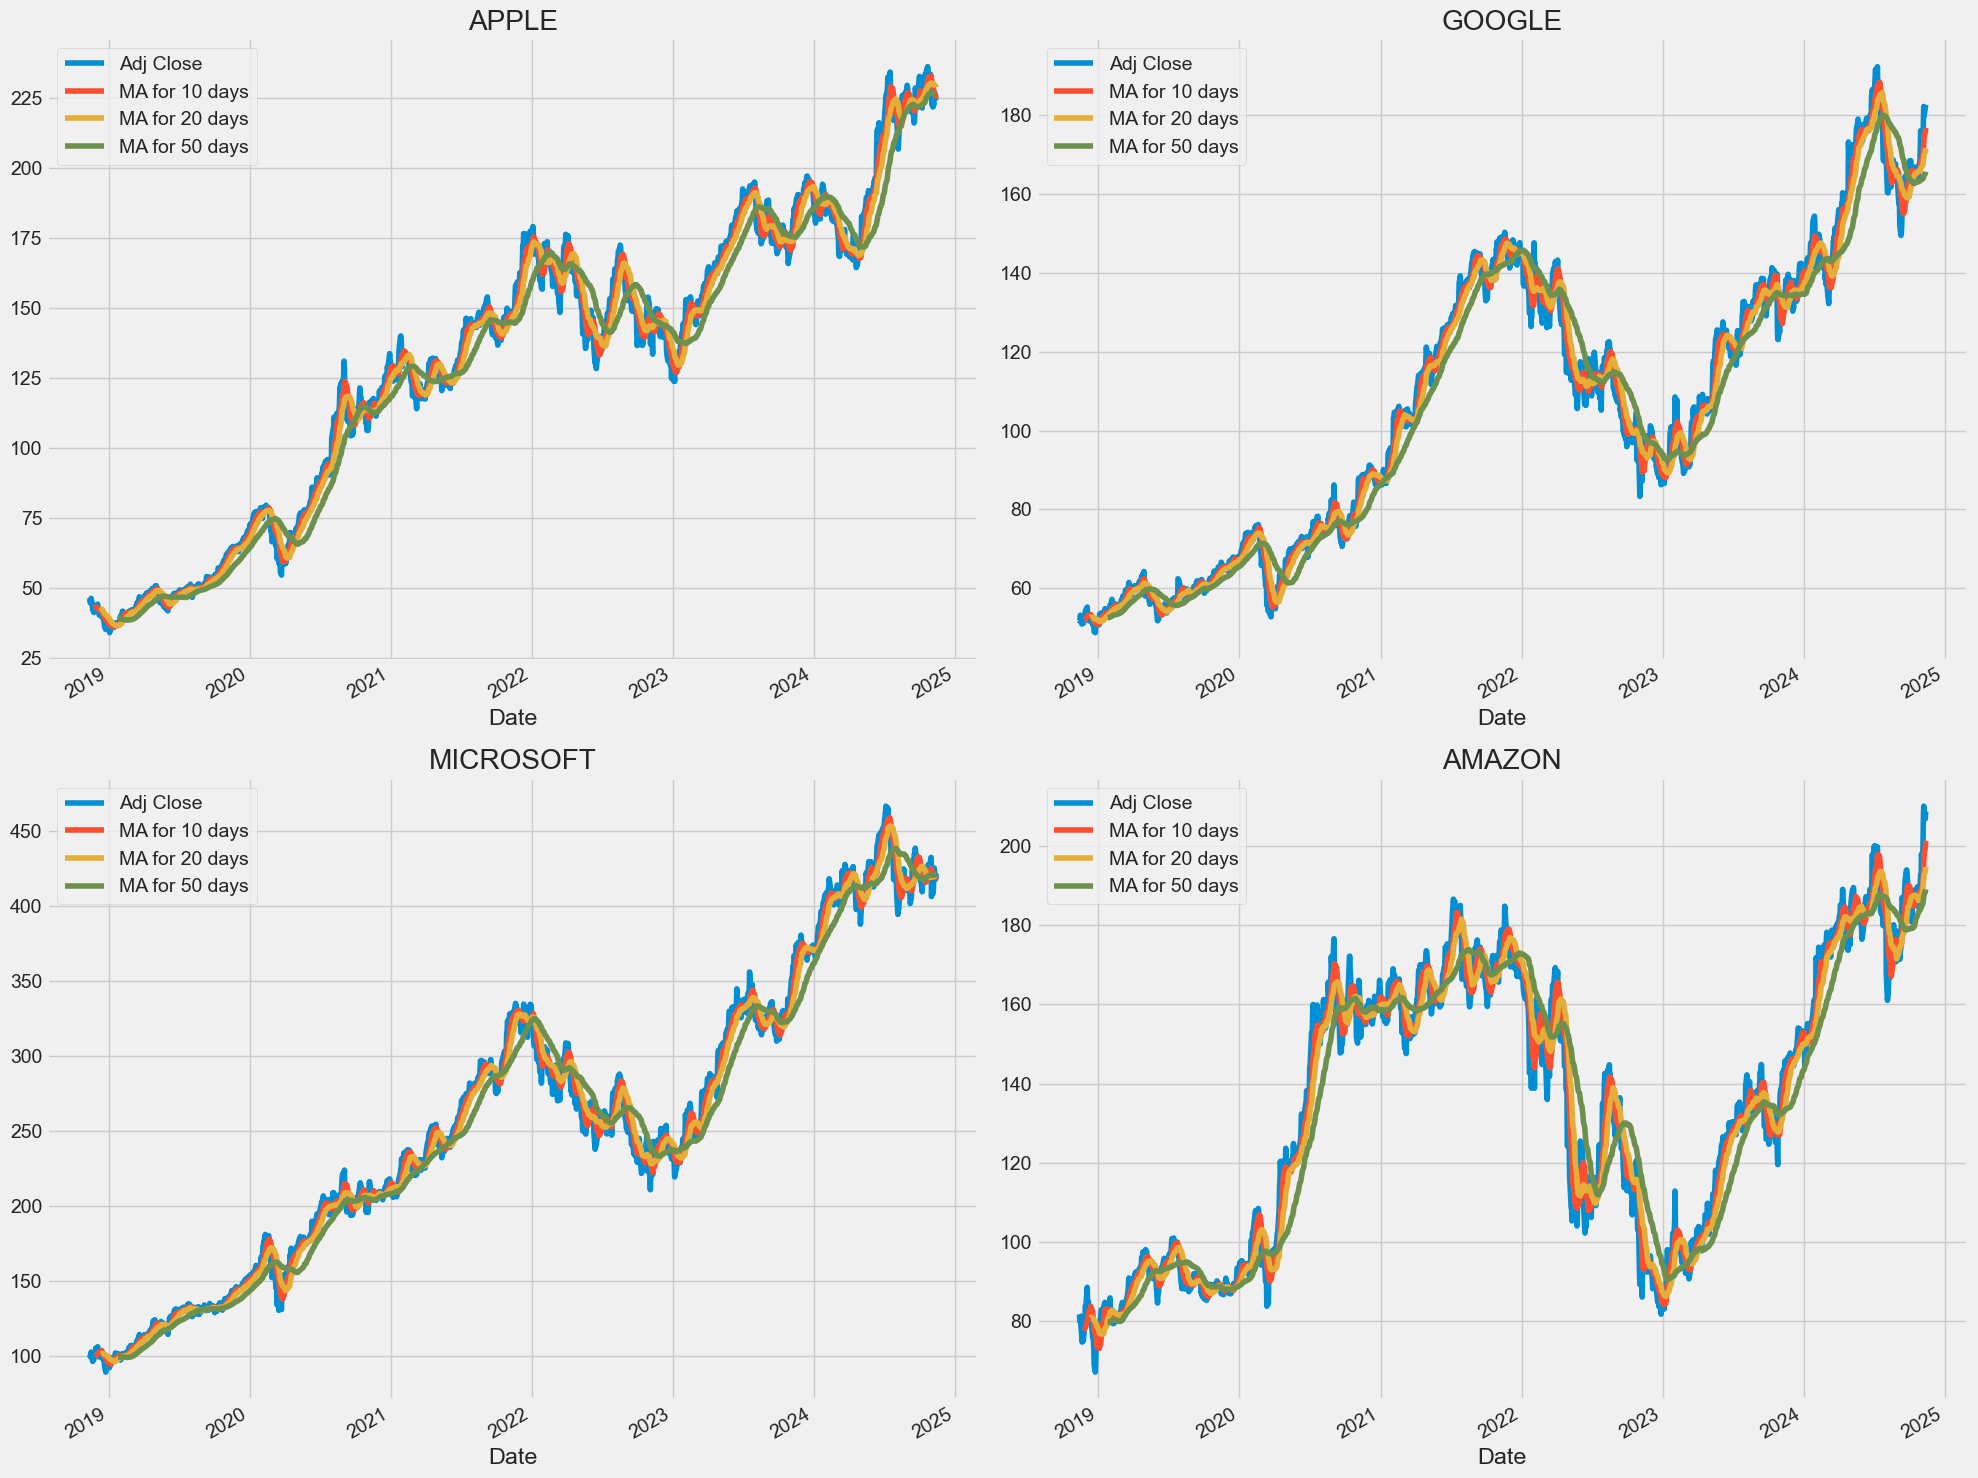

In [38]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(20)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

The correlation between stocks closing prices and ROI. A quick glance shows an interesting correlation between most of their daily returns. It makes sense since all of them are tech stocks and all get affected the same way by the news. 

In [43]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-11-12,NaN,NaN,NaN,NaN
2018-11-13,-0.009991,-0.003470,-0.002484,0.000655
2018-11-14,-0.028247,-0.019716,0.007345,-0.014181
2018-11-15,0.024678,0.012777,0.020169,0.022006
2018-11-16,0.011076,-0.016073,-0.003024,0.009415


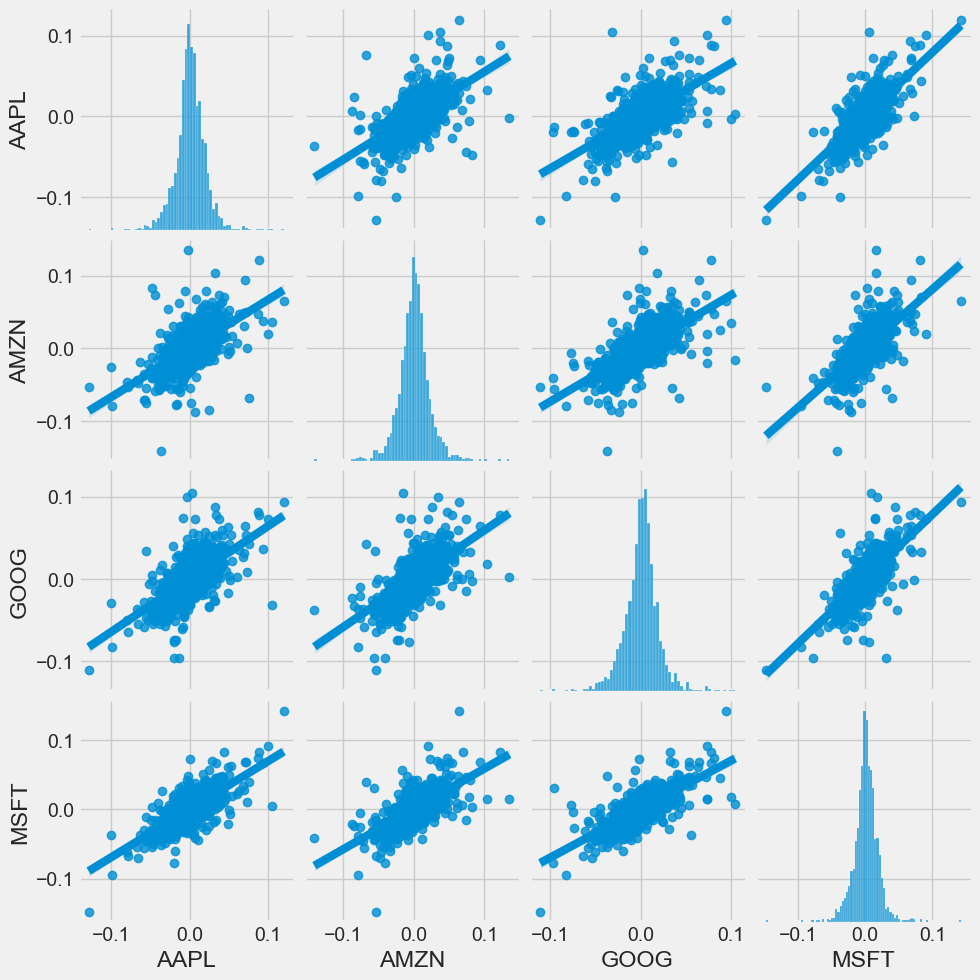

In [45]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Text(0.5, 1.0, 'Correlation of stock closing price')

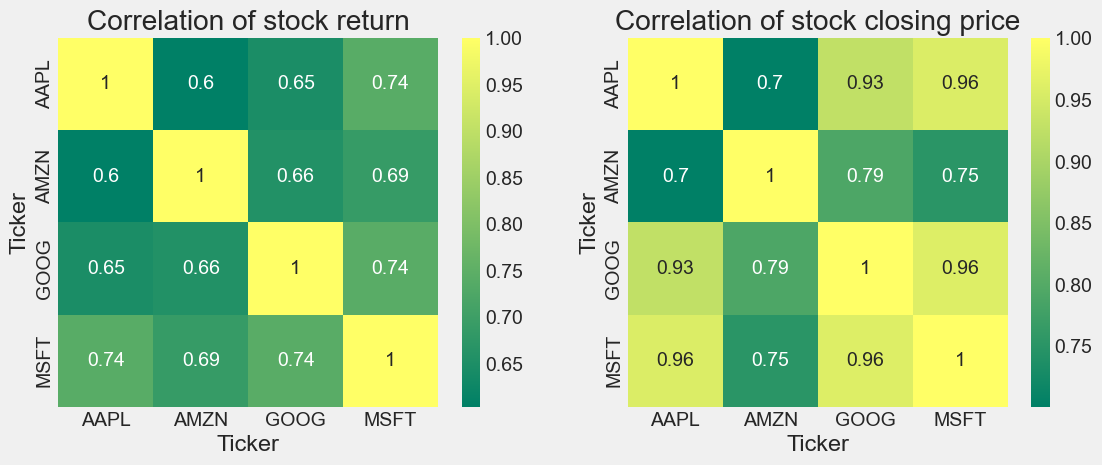

In [50]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Visualising using box plots for their daily ROI which shows all of them display similar amounts of volatility and risk.

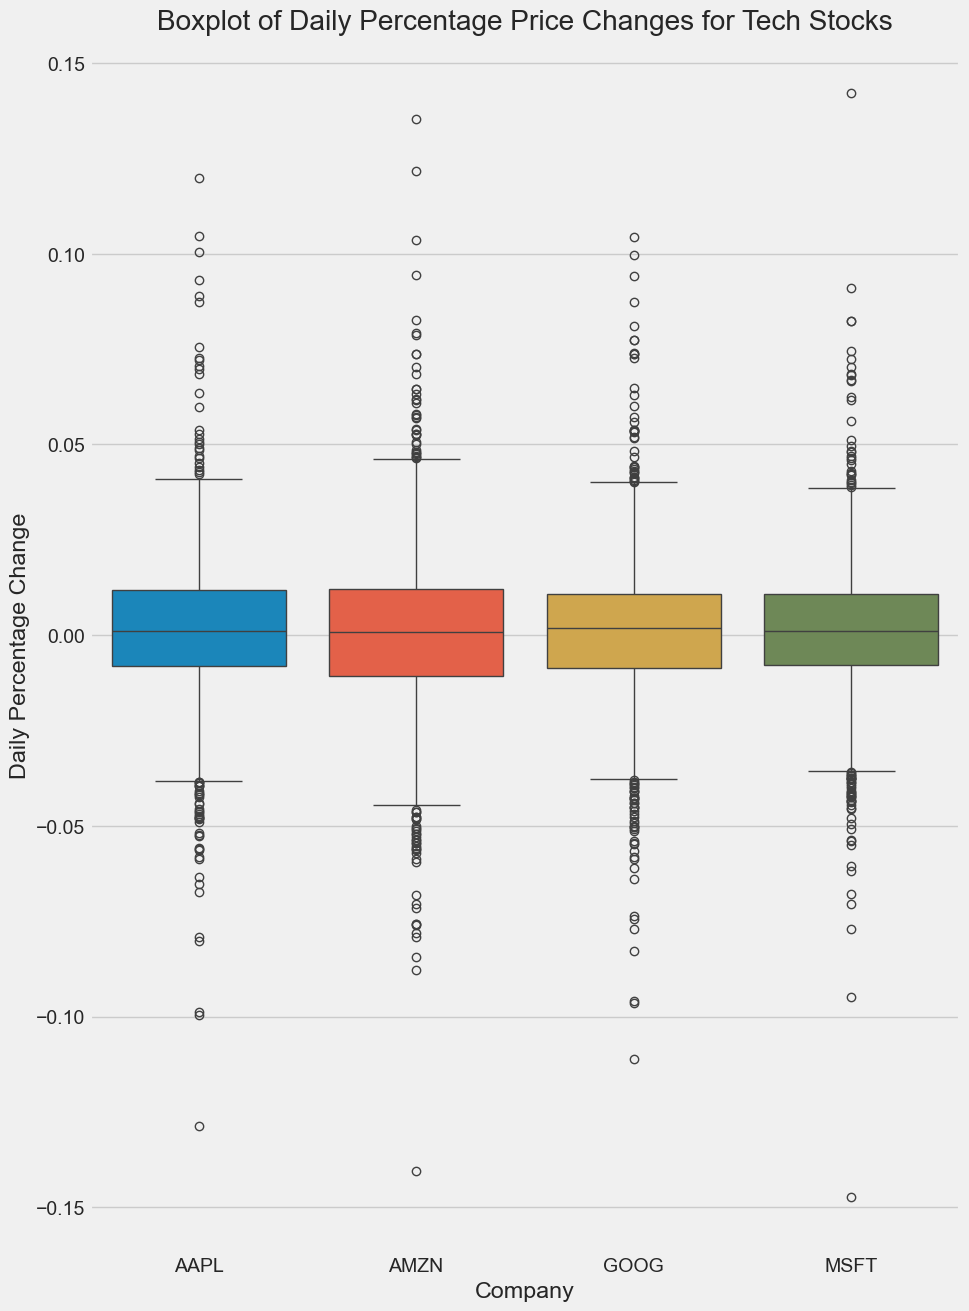

In [49]:
# Set the figure size for better visibility
plt.figure(figsize=(10, 15))

# Use Seaborn to plot boxplots for each stock's percentage price change (returns)
sns.boxplot(data=tech_rets)

# Add titles and labels for clarity
plt.title("Boxplot of Daily Percentage Price Changes for Tech Stocks")
plt.ylabel("Daily Percentage Change")
plt.xlabel("Company")
plt.show()


## Preprocessing & Model Predictions for Apple

### Data fetching and preprocessing

In [99]:
# Get the stock quote, starting from 2012 for more data
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.388994,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.455575,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.593854,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.725512,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.705327,394024400
...,...,...,...,...,...,...
2024-11-06,222.610001,226.070007,221.190002,222.720001,222.475235,54561100
2024-11-07,224.630005,227.880005,224.570007,227.479996,227.229996,42137700
2024-11-08,227.169998,228.660004,226.410004,226.960007,226.960007,38328800


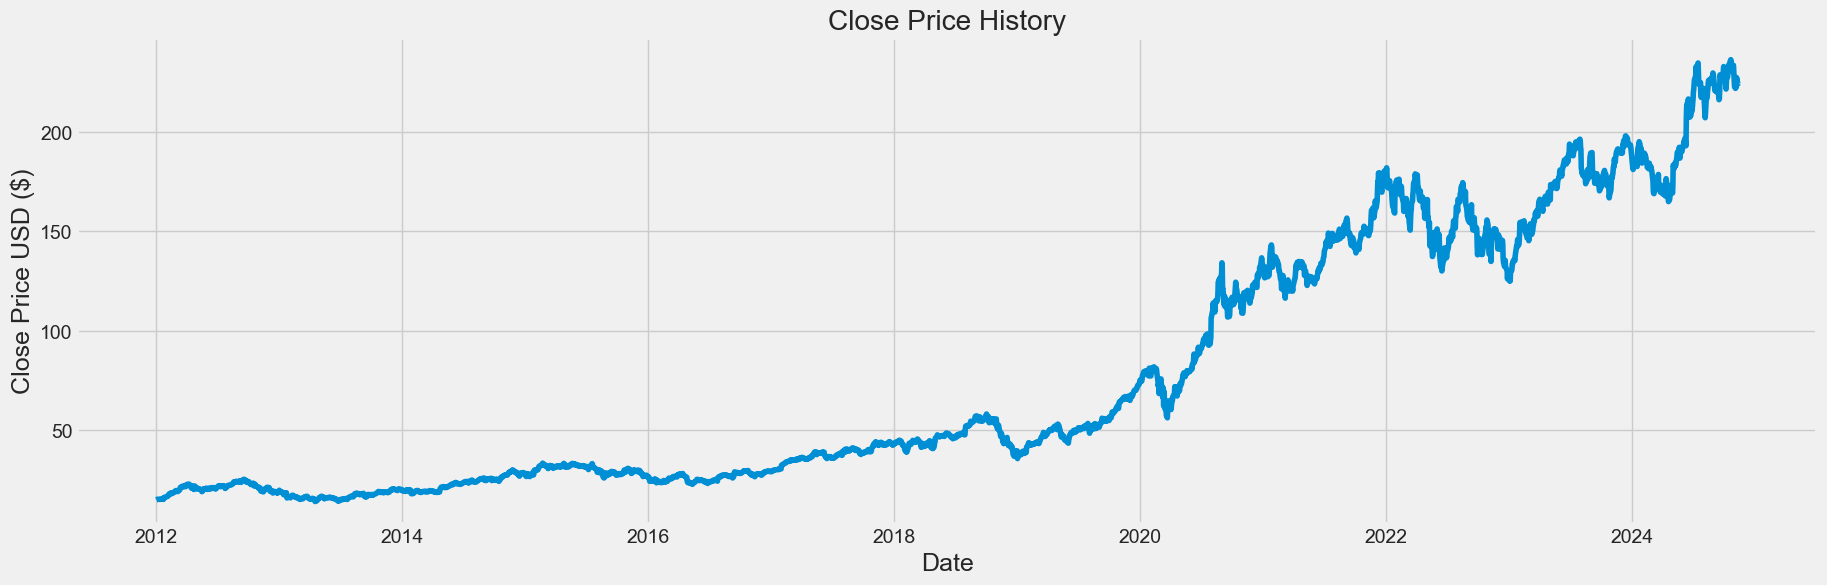

In [100]:
plt.figure(figsize=(20,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [101]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3076

MinMax Scaling the data between 0 and 1 because our model could overfit on new data only because of the larger Close prices now.

In [102]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00332215],
       [0.00367683],
       [0.00441348],
       ...,
       [0.95721978],
       [0.94495186],
       [0.94641231]])

Converting the data to Numpy arrays to feed it to Keras models.

In [103]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00332215, 0.00367683, 0.00441348, 0.00511482, 0.00500729,
       0.00524963, 0.00513889, 0.00495273, 0.00469915, 0.00548395,
       0.00619171, 0.00597344, 0.00477779, 0.00591888, 0.00479545,
       0.00900831, 0.00868252, 0.00910782, 0.01002743, 0.01058432,
       0.01053778, 0.01036606, 0.0110979 , 0.0117864 , 0.01256638,
       0.01382623, 0.01647271, 0.01651284, 0.01798614, 0.0190871 ,
       0.01719492, 0.01792354, 0.0179091 , 0.01995214, 0.01966165,
       0.02019929, 0.02116544, 0.02170309, 0.02325182, 0.02438006,
       0.02470586, 0.02481981, 0.02289072, 0.02242529, 0.02249431,
       0.02430785, 0.02481821, 0.02591436, 0.02849824, 0.03194558,
       0.0313004 , 0.03130201, 0.03379442, 0.03457441, 0.03401911,
       0.03351196, 0.03298395, 0.0347381 , 0.03594178, 0.03644572])]
[np.float64(0.03520031440172121)]

[array([0.00332215, 0.00367683, 0.00441348, 0.00511482, 0.00500729,
       0.00524963, 0.00513889, 0.00495273, 0.00469915, 0.00548395,
       0.00619171, 0.00

### Model building & training

In [109]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=16, epochs=12)

Epoch 1/12


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0085
Epoch 2/12
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 3.1411e-04
Epoch 3/12
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 2.9429e-04
Epoch 4/12
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 2.8238e-04
Epoch 5/12
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 2.2132e-04
Epoch 6/12
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 2.1180e-04
Epoch 7/12
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 1.6775e-04
Epoch 8/12
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 1.7445e-04
Epoch 9/12
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 1.8504e-04
Epoch 10/12
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 1.4380e-04
Epoch 11/12
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 2.0169e-04
Epoch 12/12
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 1.3983e-04


### Predictions

In [110]:
# Create the testing data set
# Create a new array containing scaled values
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


np.float64(3.951656753889834)

Validating the model accuarcy by predicting the last 60 days of Apple closing price

/var/folders/40/y9g_vfpj23d9tshh_jjqnb7h0000gn/T/ipykernel_39135/2431372164.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


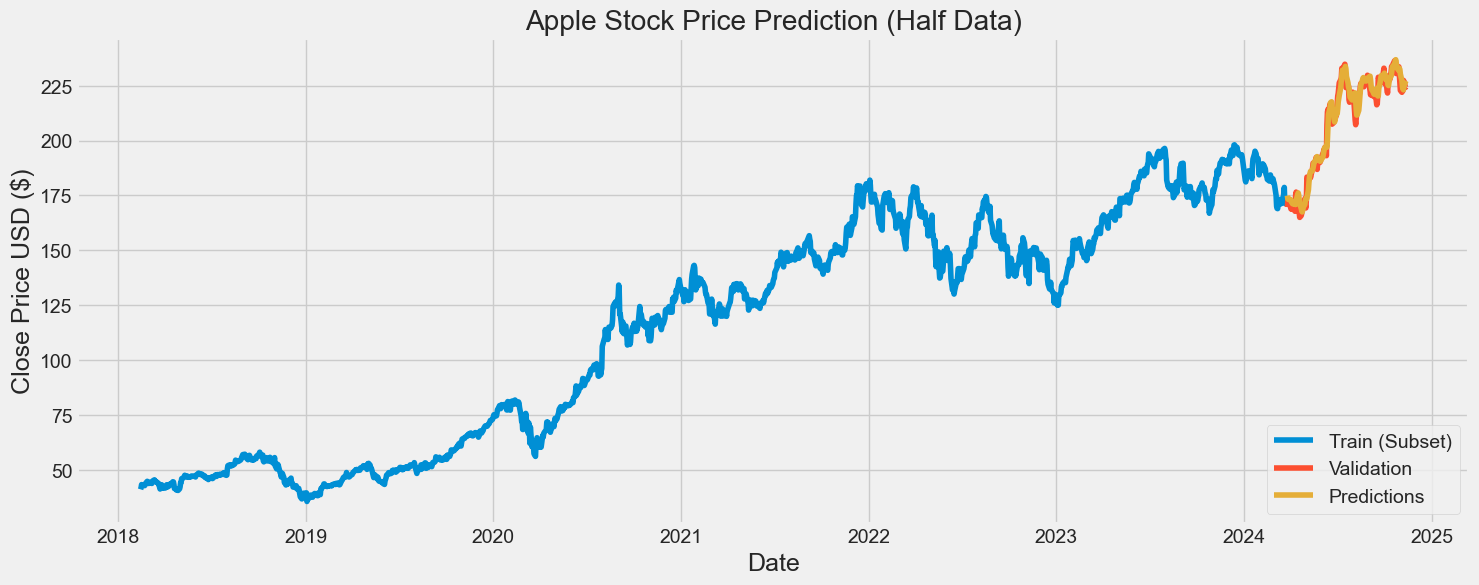

In [111]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Define the midpoint for cutting the data in half
midpoint = len(train) // 2

# Cut the train data in half to focus on recent data
train_subset = train.iloc[midpoint:]  # Use the latter half of training data

# Plot the data
plt.figure(figsize=(16, 6))
plt.title('Apple Stock Price Prediction (Half Data)')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Plot the selected subset for training and the validation data
plt.plot(train_subset['Close'], label='Train')
plt.plot(valid[['Close', 'Predictions']], label='Validation and Predictions')

plt.legend(['Train (Subset)', 'Validation', 'Predictions'], loc='lower right')
plt.show()


In [112]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2024-03-26,169.710007,174.955292
2024-03-27,173.309998,173.305023
2024-03-28,171.479996,173.210098
2024-04-01,170.029999,173.159622
2024-04-02,168.839996,172.760712
...,...,...
2024-11-06,222.720001,223.534454
2024-11-07,227.479996,223.150330
2024-11-08,226.960007,224.923676


For the fun of why not try to predict the next 60 days by:
- After training the model, we'll use a "seed" sequence of the last 60 data points.
- We'll generate predictions iteratively by feeding the model's predictions back as inputs, extending the sequence.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━

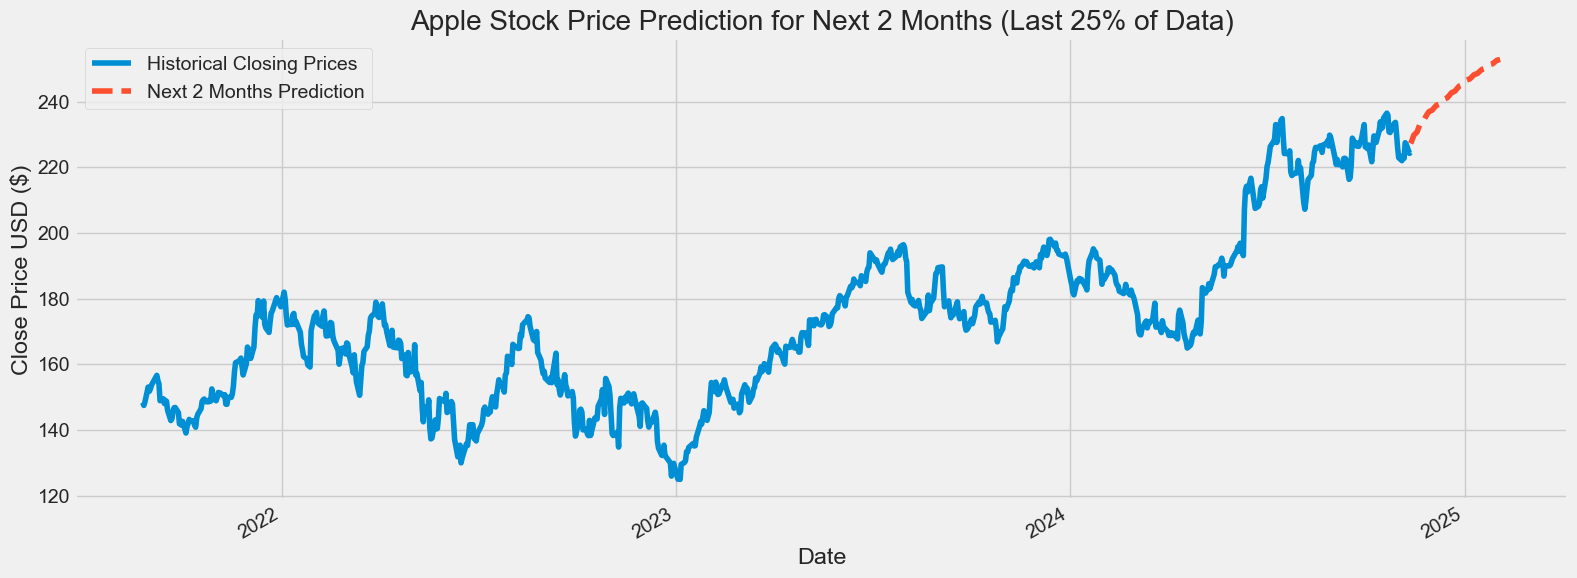

In [113]:
import matplotlib.dates as mdates

# Assuming `data` is your original DataFrame with the Apple stock data

# 1. Prepare the seed data for the future prediction (last 60 data points of the training data)
last_60_days = data['Close'].values[-60:]  # Get the last 60 days of stock prices
last_60_days_scaled = scaler.transform(last_60_days.reshape(-1, 1))  # Scale the data

# Reshape the seed input to 3D for LSTM
seed_input = np.array([last_60_days_scaled])
seed_input = np.reshape(seed_input, (seed_input.shape[0], seed_input.shape[1], 1))

# 2. Generate future predictions (Next 60 days)
future_predictions = []  # List to store future predictions

for _ in range(60):
    # Predict the next day
    next_pred = model.predict(seed_input)[0][0]
    future_predictions.append(next_pred)
    
    # Update the seed_input with the new prediction (to predict the next day)
    next_pred_reshaped = np.array([[[next_pred]]])  # Shape (1, 1, 1) for LSTM
    seed_input = np.append(seed_input[:, 1:, :], next_pred_reshaped, axis=1)

# Transform the predictions back to the original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# 3. Plot the results

# Define the subset of data to include only the last quarter (last 25% of data)
data_recent = data[-len(data) // 4:]

# Define x-values for the historical data and future predictions
x_values_recent = data_recent.index  # Use the actual date index for recent data
x_values_future = pd.date_range(start=data_recent.index[-1], periods=60, freq='B')  # Next 60 business days

# Plot historical and future predictions
plt.figure(figsize=(16, 6))
plt.plot(x_values_recent, data_recent['Close'], label='Historical Closing Prices')
plt.plot(x_values_future, future_predictions, label='Next 2 Months Prediction', linestyle='dashed')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend()
plt.title('Apple Stock Price Prediction for Next 2 Months (Last 25% of Data)')

# Format the x-axis for date display
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Set ticks every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Display date in Year-Month-Day format
plt.gcf().autofmt_xdate()  # Rotate the x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()
